In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import gensim
from gensim.models import FastText
import random
from tabulate import tabulate
from tqdm import tqdm
import tensorflow as tf

In [ ]:
import nltk
import subprocess
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('punkt', download_dir='/kaggle/working/')
    nltk.download('wordnet', download_dir='/kaggle/working/')
    nltk.download('stopwords', download_dir='/kaggle/working/')
    nltk.download('wordnet', download_dir='/kaggle/working/')
    nltk.download('averaged_perceptron_tagger', download_dir='/kaggle/working/')

    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /kaggle/working/...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data] Downloading package stopwords to /kaggle/working/...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /kaggle/working/...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/awork/1o6milion_train.csv')
test = pd.read_csv('/content/drive/MyDrive/awork/1o6million_test.csv')

In [ ]:
train.shape

(1280000, 2)

In [ ]:
test.shape

(320000, 2)

In [ ]:
train_data = train[:10000]
test_data = test[:2000]

In [ ]:
df = pd.concat([train_data,test_data], ignore_index=True, sort =False)

In [ ]:
df.head(10)

,label,tweet
0,1,yeah would agree
1,0,faa intention pilot safety training well recie...
2,1,think time early night eps family guy bed
3,1,chicken eat much steak
4,1,woohoo faith play dublin august excellent feel...
5,1,use window mobile phone pay
6,0,crazy cat man guy dude turn
7,0,crave bbq bad dont bbq
8,0,busy week ahead already tire
9,1,back home weaverville


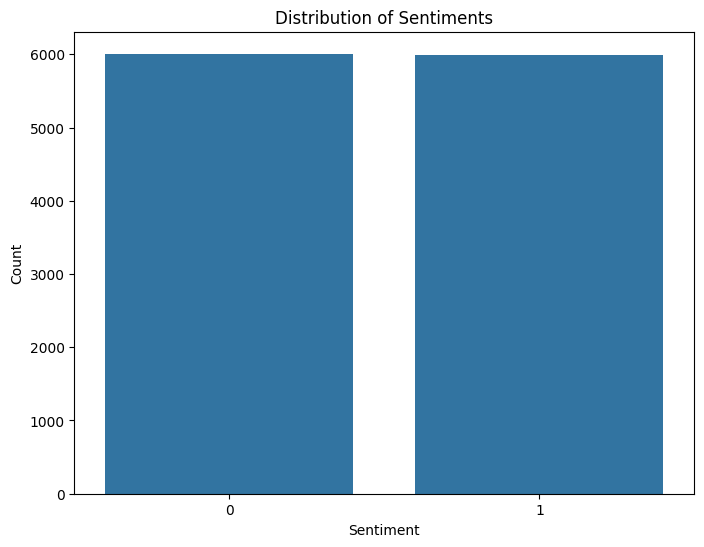

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
df.head(20)

,label,tweet
0,1,yeah would agree
1,0,faa intention pilot safety training well recie...
2,1,think time early night eps family guy bed
3,1,chicken eat much steak
4,1,woohoo faith play dublin august excellent feel...
5,1,use window mobile phone pay
6,0,crazy cat man guy dude turn
7,0,crave bbq bad dont bbq
8,0,busy week ahead already tire
9,1,back home weaverville


In [ ]:
df.tail(50)

,label,tweet
11950,1,hey love burning book tour
11951,1,milord come back miss load much luv devote gro...
11952,1,well diversity britain get talent bet burst su...
11953,1,hey twitter life flipside
11954,0,awww
11955,1,get fix room
11956,0,mean display chinese input box
11957,0,must sydney real estate bloody expensive like ...
11958,1,still high yesterday
11959,0,five day left


In [ ]:
df.shape

(12000, 2)

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df['tweet']
y = df['label']

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert sentiment labels to numerical format
# y_train_numeric = (y_train == 'Positive').astype(int)
# y_test_numeric = (y_test == 'Positive').astype(int)

# Displaying the shapes of the new DataFrames
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (9600,)
Testing data shape: (2400,)


In [ ]:
!pip install gensim

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Handle NaN values by filling them with empty strings
X_train_filled = X_train.fillna('')
X_test_filled = X_test.fillna('')

# Fit TF-IDF vectorizer on training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_filled) # Use the filled training data
X_test_tfidf = tfidf_vectorizer.transform(X_test_filled) # Use the filled testing data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Decision Tree classifier
dt_tfidf = DecisionTreeClassifier(random_state=42)

# Fit Decision Tree classifier on TF-IDF features
dt_tfidf.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_dt_tfidf = dt_tfidf.predict(X_test_tfidf)

# Evaluate Decision Tree classifier with TF-IDF
accuracy_dt_tfidf = accuracy_score(y_test, y_pred_dt_tfidf)
print("Decision Tree Classifier with TF-IDF Accuracy:", accuracy_dt_tfidf)
print("Decision Tree Classifier with TF-IDF Classification Report:")
print(classification_report(y_test, y_pred_dt_tfidf))


Decision Tree Classifier with TF-IDF Accuracy: 0.6616666666666666
Decision Tree Classifier with TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1219
           1       0.67      0.62      0.64      1181

    accuracy                           0.66      2400
   macro avg       0.66      0.66      0.66      2400
weighted avg       0.66      0.66      0.66      2400



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize SVM classifier
svm_tfidf = SVC(kernel='linear', random_state=42)

# Fit SVM classifier on TF-IDF features
svm_tfidf.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_svm_tfidf = svm_tfidf.predict(X_test_tfidf)

# Evaluate SVM classifier with TF-IDF
accuracy_svm_tfidf = accuracy_score(y_test, y_pred_svm_tfidf)
print("SVM Classifier with TF-IDF Accuracy:", accuracy_svm_tfidf)
print("SVM Classifier with TF-IDF Classification Report:")
print(classification_report(y_test, y_pred_svm_tfidf))


SVM Classifier with TF-IDF Accuracy: 0.7191666666666666
SVM Classifier with TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1219
           1       0.71      0.73      0.72      1181

    accuracy                           0.72      2400
   macro avg       0.72      0.72      0.72      2400
weighted avg       0.72      0.72      0.72      2400



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest classifier
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit Random Forest classifier on TF-IDF features
rf_tfidf.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_rf_tfidf = rf_tfidf.predict(X_test_tfidf)

# Evaluate Random Forest classifier with TF-IDF
accuracy_rf_tfidf = accuracy_score(y_test, y_pred_rf_tfidf)
print("Random Forest Classifier with TF-IDF Accuracy:", accuracy_rf_tfidf)
print("Random Forest Classifier with TF-IDF Classification Report:")
print(classification_report(y_test, y_pred_rf_tfidf))


Random Forest Classifier with TF-IDF Accuracy: 0.7045833333333333
Random Forest Classifier with TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1219
           1       0.70      0.70      0.70      1181

    accuracy                           0.70      2400
   macro avg       0.70      0.70      0.70      2400
weighted avg       0.70      0.70      0.70      2400



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression classifier
lr_tfidf = LogisticRegression(random_state=42)

# Fit Logistic Regression classifier on TF-IDF features
lr_tfidf.fit(X_train_tfidf, y_train)

y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)

accuracy_lr_tfidf = accuracy_score(y_test, y_pred_lr_tfidf)
print("Logistic Regression with TF-IDF Accuracy:", accuracy_lr_tfidf)
print("Logistic Regression with TF-IDF Classification Report:")
print(classification_report(y_test, y_pred_lr_tfidf))

Logistic Regression with TF-IDF Accuracy: 0.71875
Logistic Regression with TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1219
           1       0.71      0.72      0.72      1181

    accuracy                           0.72      2400
   macro avg       0.72      0.72      0.72      2400
weighted avg       0.72      0.72      0.72      2400



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)
y_pred_mnb_tfidf = mnb_tfidf.predict(X_test_tfidf)

accuracy_mnb_tfidf = accuracy_score(y_test, y_pred_mnb_tfidf)
print("Multinomial Naive Bayes with TF-IDF Accuracy:", accuracy_mnb_tfidf)
print("Multinomial Naive Bayes with TF-IDF Classification Report:")
print(classification_report(y_test, y_pred_mnb_tfidf))

Multinomial Naive Bayes with TF-IDF Accuracy: 0.7191666666666666
Multinomial Naive Bayes with TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1219
           1       0.72      0.70      0.71      1181

    accuracy                           0.72      2400
   macro avg       0.72      0.72      0.72      2400
weighted avg       0.72      0.72      0.72      2400



In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Example Butterfly Optimization Algorithm implementation
class ButterflyOptimizationAlgorithm:
    def __init__(self, objective_function, num_butterflies, num_features, max_iter):
        self.objective_function = objective_function
        self.num_butterflies = num_butterflies
        self.num_features = num_features
        self.max_iter = max_iter
        self.butterflies = np.random.randint(2, size=(self.num_butterflies, self.num_features))
        self.fitness = np.zeros(self.num_butterflies)

    def optimize(self):
        for iteration in range(self.max_iter):
            for i in range(self.num_butterflies):
                self.fitness[i] = self.objective_function(self.butterflies[i])
            best_butterfly = self.butterflies[np.argmax(self.fitness)]
            for i in range(self.num_butterflies):
                r = np.random.random()
                if r < 0.8:
                    self.butterflies[i] = best_butterfly
                else:
                    self.butterflies[i] = np.random.randint(2, size=self.num_features)
            if iteration % 20 == 0:
                print(f"Iteration {iteration}, Best Fitness: {np.max(self.fitness)}")
        best_butterfly = self.butterflies[np.argmax(self.fitness)]
        return best_butterfly

# Example objective function: Accuracy of a classifier
def objective_function(selected_features):
    selected_columns = np.where(selected_features == 1)[0]
    if len(selected_columns) == 0:
        return 0
    X_train_selected = X_train_tfidf[:, selected_columns]
    X_test_selected = X_test_tfidf[:, selected_columns]
    clf = MultinomialNB()
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)


# Define the problem parameters
num_features = X_train_tfidf.shape[1]
num_butterflies = 20

max_iter = 100

# Initialize BOA and optimize
boa = ButterflyOptimizationAlgorithm(objective_function, num_butterflies, num_features, max_iter)
best_features = boa.optimize()

# Evaluate the model using the best features
selected_columns = np.where(best_features == 1)[0]
X_train_selected = X_train_tfidf[:, selected_columns]
X_test_selected = X_test_tfidf[:, selected_columns]
clf = MultinomialNB()
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy after feature selection: {accuracy}")


Iteration 0, Best Fitness: 0.67875
Iteration 20, Best Fitness: 0.6870833333333334
Iteration 40, Best Fitness: 0.6741666666666667
Iteration 60, Best Fitness: 0.6841666666666667
Iteration 80, Best Fitness: 0.6704166666666667
Accuracy after feature selection: 0.67375


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Example Butterfly Optimization Algorithm implementation
class ButterflyOptimizationAlgorithm:
    def __init__(self, objective_function, num_butterflies, num_features, max_iter):
        self.objective_function = objective_function
        self.num_butterflies = num_butterflies
        self.num_features = num_features
        self.max_iter = max_iter
        self.butterflies = np.random.randint(2, size=(self.num_butterflies, self.num_features))
        self.fitness = np.zeros(self.num_butterflies)

    def optimize(self):
        for iteration in range(self.max_iter):
            for i in range(self.num_butterflies):
                self.fitness[i] = self.objective_function(self.butterflies[i])
            best_butterfly = self.butterflies[np.argmax(self.fitness)]
            for i in range(self.num_butterflies):
                r = np.random.random()
                if r < 0.8:
                    self.butterflies[i] = best_butterfly
                else:
                    self.butterflies[i] = np.random.randint(2, size=self.num_features)
            if iteration % 20 == 0:
                print(f"Iteration {iteration}, Best Fitness: {np.max(self.fitness)}")
        best_butterfly = self.butterflies[np.argmax(self.fitness)]
        return best_butterfly

# Example objective function: Accuracy of a classifier
def objective_function(selected_features):
    selected_columns = np.where(selected_features == 1)[0]
    if len(selected_columns) == 0:
        return 0
    X_train_selected = X_train_tfidf[:, selected_columns]
    X_test_selected = X_test_tfidf[:, selected_columns]
    clf = SVC(kernel='linear', random_state=42)
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)


# Define the problem parameters
num_features = X_train_tfidf.shape[1]
num_butterflies = 20
max_iter = 100

# Initialize BOA and optimize
boa = ButterflyOptimizationAlgorithm(objective_function, num_butterflies, num_features, max_iter)
best_features = boa.optimize()

# Evaluate the model using the best features
selected_columns = np.where(best_features == 1)[0]
X_train_selected = X_train_tfidf[:, selected_columns]
X_test_selected = X_test_tfidf[:, selected_columns]
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy after feature selection: {accuracy}")

Iteration 0, Best Fitness: 0.6766666666666666
Iteration 20, Best Fitness: 0.6666666666666666
Iteration 40, Best Fitness: 0.6766666666666666
Iteration 60, Best Fitness: 0.6708333333333333


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Example Butterfly Optimization Algorithm implementation
class ButterflyOptimizationAlgorithm:
    def __init__(self, objective_function, num_butterflies, num_features, max_iter):
        self.objective_function = objective_function
        self.num_butterflies = num_butterflies
        self.num_features = num_features
        self.max_iter = max_iter
        self.butterflies = np.random.randint(2, size=(self.num_butterflies, self.num_features))
        self.fitness = np.zeros(self.num_butterflies)

    def optimize(self):
        for iteration in range(self.max_iter):
            for i in range(self.num_butterflies):
                self.fitness[i] = self.objective_function(self.butterflies[i])
            best_butterfly = self.butterflies[np.argmax(self.fitness)]
            for i in range(self.num_butterflies):
                r = np.random.random()
                if r < 0.8:
                    self.butterflies[i] = best_butterfly
                else:
                    self.butterflies[i] = np.random.randint(2, size=self.num_features)
            if iteration % 20 == 0:
                print(f"Iteration {iteration}, Best Fitness: {np.max(self.fitness)}")
        best_butterfly = self.butterflies[np.argmax(self.fitness)]
        return best_butterfly

# Example objective function: Accuracy of a classifier
def objective_function(selected_features):
    selected_columns = np.where(selected_features == 1)[0]
    if len(selected_columns) == 0:
        return 0
    X_train_selected = X_train_tfidf[:, selected_columns]
    X_test_selected = X_test_tfidf[:, selected_columns]
    clf = LogisticRegression(random_state=42) # Using Logistic Regression
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)


# Define the problem parameters
num_features = X_train_tfidf.shape[1]
num_butterflies = 20
max_iter = 100

# Initialize BOA and optimize
boa = ButterflyOptimizationAlgorithm(objective_function, num_butterflies, num_features, max_iter)
best_features = boa.optimize()

# Evaluate the model using the best features
selected_columns = np.where(best_features == 1)[0]
X_train_selected = X_train_tfidf[:, selected_columns]
X_test_selected = X_test_tfidf[:, selected_columns]
clf = LogisticRegression(random_state=42) # Using Logistic Regression
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy after feature selection: {accuracy}")


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Example Butterfly Optimization Algorithm implementation
class ButterflyOptimizationAlgorithm:
    def __init__(self, objective_function, num_butterflies, num_features, max_iter):
        self.objective_function = objective_function
        self.num_butterflies = num_butterflies
        self.num_features = num_features
        self.max_iter = max_iter
        self.butterflies = np.random.randint(2, size=(self.num_butterflies, self.num_features))
        self.fitness = np.zeros(self.num_butterflies)

    def optimize(self):
        for iteration in range(self.max_iter):
            for i in range(self.num_butterflies):
                self.fitness[i] = self.objective_function(self.butterflies[i])
            best_butterfly = self.butterflies[np.argmax(self.fitness)]
            for i in range(self.num_butterflies):
                r = np.random.random()
                if r < 0.8:
                    self.butterflies[i] = best_butterfly
                else:
                    self.butterflies[i] = np.random.randint(2, size=self.num_features)
            if iteration % 20 == 0:
                print(f"Iteration {iteration}, Best Fitness: {np.max(self.fitness)}")
        best_butterfly = self.butterflies[np.argmax(self.fitness)]
        return best_butterfly

# Example objective function: Accuracy of a classifier
def objective_function(selected_features):
    selected_columns = np.where(selected_features == 1)[0]
    if len(selected_columns) == 0:
        return 0
    X_train_selected = X_train_tfidf[:, selected_columns]
    X_test_selected = X_test_tfidf[:, selected_columns]
    clf = DecisionTreeClassifier(random_state=42) # Using Decision Tree
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)


# Define the problem parameters
num_features = X_train_tfidf.shape[1]
num_butterflies = 20
max_iter = 100

# Initialize BOA and optimize
boa = ButterflyOptimizationAlgorithm(objective_function, num_butterflies, num_features, max_iter)
best_features = boa.optimize()

# Evaluate the model using the best features
selected_columns = np.where(best_features == 1)[0]
X_train_selected = X_train_tfidf[:, selected_columns]
X_test_selected = X_test_tfidf[:, selected_columns]
clf = DecisionTreeClassifier(random_state=42) # Using Decision Tree
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy after feature selection: {accuracy}")

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example Butterfly Optimization Algorithm implementation
class ButterflyOptimizationAlgorithm:
    def __init__(self, objective_function, num_butterflies, num_features, max_iter):
        self.objective_function = objective_function
        self.num_butterflies = num_butterflies
        self.num_features = num_features
        self.max_iter = max_iter
        self.butterflies = np.random.randint(2, size=(self.num_butterflies, self.num_features))
        self.fitness = np.zeros(self.num_butterflies)

    def optimize(self):
        for iteration in range(self.max_iter):
            for i in range(self.num_butterflies):
                self.fitness[i] = self.objective_function(self.butterflies[i])
            best_butterfly = self.butterflies[np.argmax(self.fitness)]
            for i in range(self.num_butterflies):
                r = np.random.random()
                if r < 0.8:
                    self.butterflies[i] = best_butterfly
                else:
                    self.butterflies[i] = np.random.randint(2, size=self.num_features)
            if iteration % 20 == 0:
                print(f"Iteration {iteration}, Best Fitness: {np.max(self.fitness)}")
        best_butterfly = self.butterflies[np.argmax(self.fitness)]
        return best_butterfly

# Example objective function: Accuracy of a classifier
def objective_function(selected_features):
    selected_columns = np.where(selected_features == 1)[0]
    if len(selected_columns) == 0:
        return 0
    X_train_selected = X_train_tfidf[:, selected_columns]
    X_test_selected = X_test_tfidf[:, selected_columns]
    clf = RandomForestClassifier(n_estimators=100, random_state=42) # Using Random Forest
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)


# Define the problem parameters
num_features = X_train_tfidf.shape[1]
num_butterflies = 20
max_iter = 100

# Initialize BOA and optimize
boa = ButterflyOptimizationAlgorithm(objective_function, num_butterflies, num_features, max_iter)
best_features = boa.optimize()

# Evaluate the model using the best features
selected_columns = np.where(best_features == 1)[0]
X_train_selected = X_train_tfidf[:, selected_columns]
X_test_selected = X_test_tfidf[:, selected_columns]
clf = RandomForestClassifier(n_estimators=100, random_state=42) # Using Random Forest
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy after feature selection: {accuracy}")
